# Feature Matching

Brute-Force matcher is simple. It takes the descriptor of one feature in first set and is matched with all other features in second set using some distance calculation. And the closest one is returned.

[Feature Matching](https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html)

## Importing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Loading the Images

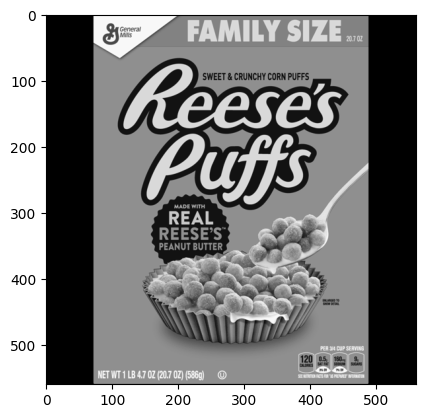

In [2]:
reeses = cv2.imread("../DATA/reeses_puffs.png", 0)
plt.imshow(reeses, cmap="gray")

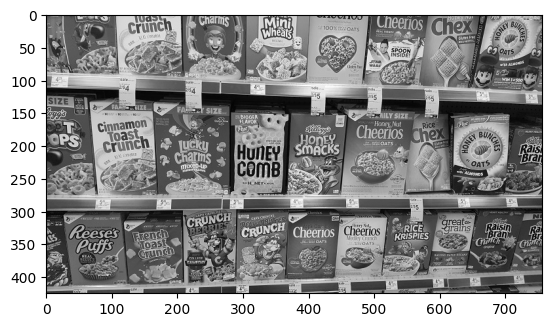

In [3]:
cereals = cv2.imread("../DATA/many_cereals.jpg", 0)
plt.imshow(cereals, cmap="gray") 

## Brute Force Detection with ORB Descriptors

Here, we will see a simple example on how to match features between two images. We start with loading images, finding descriptors etc. Next we create a bf object with distance measurement `cv.NORM_HAMMING` (since we are using ORB) and crossCheck is switched on for better results. Then we use `Matcher.match` method to get the best matches in two images. We sort them in ascending order of their distances so that best matches (with low distance) come to front. Then we draw only first 10 matches (Just for sake of visibility. We can increase it as you like)

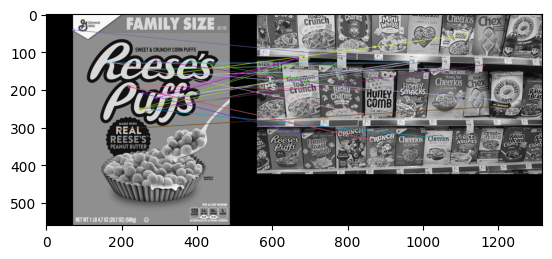

In [4]:
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x:x.distance)

reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2) # Draw first 25 matches.
plt.imshow(reeses_matches)

## Brute Force Matching with SIFT Descriptors and Ratio Test

This time, we will use `BFMatcher.knnMatch` to get k best matches. In this example, we will take k=2 so that we can apply ratio test.

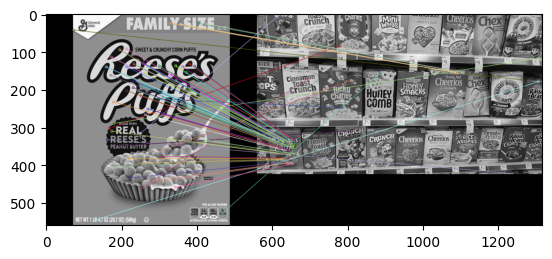

In [5]:
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

bf = cv2.BFMatcher()

matches = bf.knnMatch(des1, des2, k=2)

good = []
for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
plt.imshow(sift_matches)

## FLANN Based Matcher

FLANN stands for Fast Library for Approximate Nearest Neighbors. It contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features. It works faster than BFMatcher for large datasets.

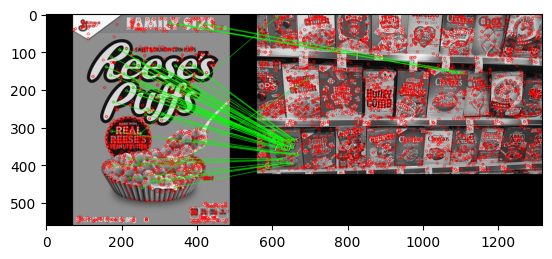

In [6]:
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

matchesMask = [[0, 0] for _ in range(len(matches))]

for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7 * match2.distance:
        matchesMask[i]=[1, 0]

draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=0)

flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
plt.imshow(flann_matches)